In [2]:
import xarray as xr
from matplotlib import pyplot as plt
import numpy as np
import math
from xhistogram.xarray import histogram
%load_ext autoreload
%autoreload 2
import pei.myfunctions as mf

In [3]:
# Specify root directory, experiment, filename format
rootdir = '/local/ss23/CESM2_LE/ATM/RCP85/WBT'
filename = '/b.e21.BHISTcmip6.f09_g17.LE2-1231.001.clm2.h7.WBT.1980010100-1990010100.nc' 
path = rootdir+filename

# Load data from matching files
ds = xr.open_dataset(path)

In [4]:
lon = ds['lon']
lat = ds['lat']

# Dictionary of region masks, represented by lon and lat arrays
masks = {}
masks['Global'] = [lon, lat]
masks['Northern North America'] = [lon.where((190<=lon)&(lon<=310),drop=True).values,lat.where((45<=lat)&(lat<=75),drop=True).values]
masks['Central North America'] = [lon.where((230<=lon)&(lon<=310),drop=True).values,lat.where((35<=lat)&(lat<=45),drop=True).values]
masks['South-Central America'] = [lon.where((230<=lon)&(lon<=330),drop=True).values,lat.where((-30<=lat)&(lat<=35),drop=True).values]
masks['Southern South America'] = [lon.where((270<=lon)&(lon<=330),drop=True).values,lat.where((-60<=lat)&(lat<=-30),drop=True).values]
masks['China'] = [lon.where((75<=lon)&(lon<=135),drop=True).values,lat.where((22.5<=lat)&(lat<=50),drop=True).values]
masks['India'] = [lon.where((68<=lon)&(lon<=90),drop=True).values,lat.where((8<=lat)&(lat<=30),drop=True).values]
masks['Oceania'] = [lon.where((100<=lon)&(lon<=180),drop=True).values,lat.where((-50<=lat)&(lat<=0),drop=True).values]
masks['Russia'] = [lon.where((30<=lon)&(lon<=180),drop=True).values,lat.where((50<=lat)&(lat<=75),drop=True).values]
masks['Scandinavia'] = [lon.where((3<=lon)&(lon<=30),drop=True).values,lat.where((55<=lat)&(lat<=70),drop=True).values]
lon_west = lon.where(lon>=345,drop=True)
lon_east = lon.where(lon<=30,drop=True)
lon_eur = xr.concat((lon_west,lon_east),dim='lon').values
masks['Europe'] = [lon_eur,lat.where((35<=lat)&(lat<=55),drop=True)]
lon_west = lon.where(lon>=355,drop=True)
lon_east = lon.where(lon<=10,drop=True)
lon_france = xr.concat((lon_west,lon_east),dim='lon').values
masks['France'] = [lon_france,lat.where((40<=lat)&(lat<=52),drop=True)]
masks['Middle East'] = [lon.where((25<=lon)&(lon<=60),drop=True).values,lat.where((10<=lat)&(lat<=40),drop=True).values]
masks['Southeast Asia'] = [lon.where((92<=lon)&(lon<=140),drop=True).values,lat.where((-10<=lat)&(lat<=25),drop=True).values]


In [5]:
def slice_region(ds, region):
    ds_region = ds.sel(lon=masks[region][0],lat=masks[region][1])
    return ds_region

In [6]:
# Function to generate histogram
def hist(ds,area):
    # Span range of temperatures
    bins = np.linspace(-40,40,40)
    
    # Create histogram
    h = histogram(ds['WBT'],bins=[bins],weights=(ds['area']*ds['landfrac'])/area_region,density=True)
    return h

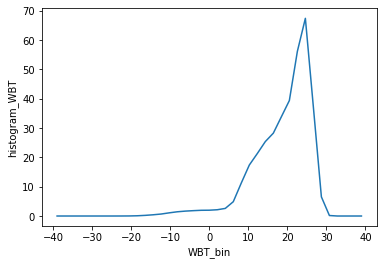

In [92]:
# Data for a specific region
region = 'India'
region_all = slice_region(ds,region)
ds_region = region_all.where(region_all['landmask']==1,0)
area_region = (ds_region['area']*ds_region['landfrac']).sum(['lon','lat'])

# Get years in data
years = np.unique(ds_region['time.year'])

total_hist = np.zeros(39)

for year in years:
    region_annual = ds_region.where(ds_region['time.year']==year,drop=True)
    total_hist += hist(region_annual.groupby('time.dayofyear').max(),area_region)

numcells = len(masks[region][0])*len(masks[region][0])
hist_avg = total_hist/(10)
hist_avg.plot()

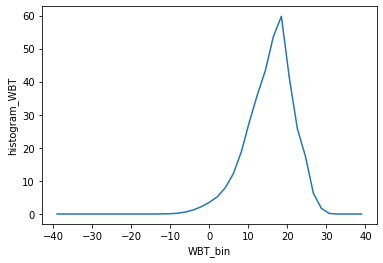

In [7]:
# Data for a specific region
region = 'Middle East'
region_all = slice_region(ds,region)
ds_region = region_all.where(region_all['landmask']==1,0)
area_region = (ds_region['area']*ds_region['landfrac']).sum(['lon','lat'])

# Get years in data
years = np.unique(ds_region['time.year'])

total_hist = np.zeros(39)

for year in years:
    region_annual = ds_region.where(ds_region['time.year']==year,drop=True)
    total_hist += hist(region_annual.groupby('time.dayofyear').max(),area_region)

numcells = len(masks[region][0])*len(masks[region][0])
hist_avg = total_hist/(10)
hist_avg.plot()